<a href="https://colab.research.google.com/github/ManikantaSanjay/Data_Analysis_Using_Python_Libraries_Series/blob/main/Data_Analysis_on_Restaurants_Listed_In_Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explonatory Data Analysis on Zomato Restaurants** 

Zomato API Analysis is one of the most useful analysis for foodies who want to taste the best cuisines of every part of the world which lies in their budget. This analysis is also for those who want to find the value for money restaurants in various parts of the country for the cuisines. Additionally, this analysis caters the needs of people who are striving to get the best cuisine of the country and which locality of that country serves that cuisines with maximum number of restaurants.

# **Content in Dataset**



*   **Restaurant Id**: Unique id of every restaurant across various cities of the world
*   **Restaurant Name**: Name of the restaurant
*   **Country Code**: Country in which restaurant is located
*   **City**: City in which restaurant is located
*   **Address**: Address of the restaurant
*   **Locality**: Location in the city
*   **Locality Verbose**: Detailed description of the locality 
*   **Longitude**: Longitude coordinate of the restaurant's location
*   **Latitude**: Latitude coordinate of the restaurant's location
*   **Cuisines**: Cuisines offered by the restaurant
*   **Average Cost for two**: Cost for two people in different currencies
*   **Currency**: Currency of the country
*   **Has Table booking**: yes/no
*   **Has Online delivery**: yes/ no
*   **Is delivering**: yes/ no
*   **Switch to order menu**: yes/no
*   **Price range**: range of price of food
*   **Aggregate Rating**: Average rating out of 5
*   **Rating color**: depending upon the average rating color
*   **Rating text**: text on the basis of rating of rating
*   Votes: Number of ratings casted by people





# **Downloading the Dataset**

In [2]:
! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/shrutimehta/zomato-restaurants-data'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: manikantasanjayv
Your Kaggle Key: ··········


100%|██████████| 5.47M/5.47M [00:00<00:00, 67.4MB/s]

# **Importing Dataset**

In [3]:
import pandas as pd

df = pd.read_csv('/content/zomato-restaurants-data/zomato.csv', engine='python')

df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
df.shape

(9551, 21)

In [5]:
## Checking if dataset contains any null

nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['Cuisines']


Cuisines seems to contain null values. Hence any futher analysis involving Cuisines the NaN values has to be considered.

In [6]:
df1 = pd.read_excel('/content/zomato-restaurants-data/Country-Code.xlsx')
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


Let us merge both the datasets. This will help us to understand the dataset contrywise.

In [7]:
df2 = pd.merge(df,df1,on='Country Code',how='left')
df2.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


# **Exploratory Analysis and Visualization**

Before we ask questions on the dataset, it would be helpful to understand the restaurants' Geographical Spread, Understanding the Rating, Currency, Online Delivery, City Coverage..etc

In [9]:
print('List of countries the survey is spread accross - ')
for x in pd.unique(df2.Country): print(x)
print()
print('Total number of countries involved', len(pd.unique(df2.Country)))

List of countries the survey is spread accross - 
Phillipines
Brazil
United States
Australia
Canada
Singapore
UAE
India
Indonesia
New Zealand
United Kingdom
Qatar
South Africa
Sri Lanka
Turkey

Total number of countries involved 15


The survey seems to have spread across **15 countries** . This shows that Zomato is a multinational company having active businesses in all these 15 countries.

In [10]:
from plotly.offline import init_notebook_mode, plot, iplot

labels = list(df2.Country.value_counts().index)
values = list(df2.Country.value_counts().values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence around the World",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Countries",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}

iplot(fig)

Since Zomato is a startup from India hence it makes sense that it has maximum businesses spread across restaurants in India.

# **Understanding the Rating Aggregate, Color and Text**

In [11]:
df3 = df2.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
df3
df3

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


The above information helps us to understand the relation between Aggregate rating, color and text. We conclude the following colors assigned to the ratings:




*   **Rating 0** - ***White*** - Not rated
*   **Rating 1.8 to 2.4** - ***Red*** - Poor
*   **Rating 2.5 to 3.4** - ***Orange*** - Average
*   **Rating 3.5 to 3.9** - ***Yellow*** - Good
*   **Rating 4.0 to 4.4** - ***Green*** - Very Good
*   **Rating 4.5 to 4.9** - ***Dark Green*** - Excellent



 



Let us try to understand the spread of Rating across Restaurants.

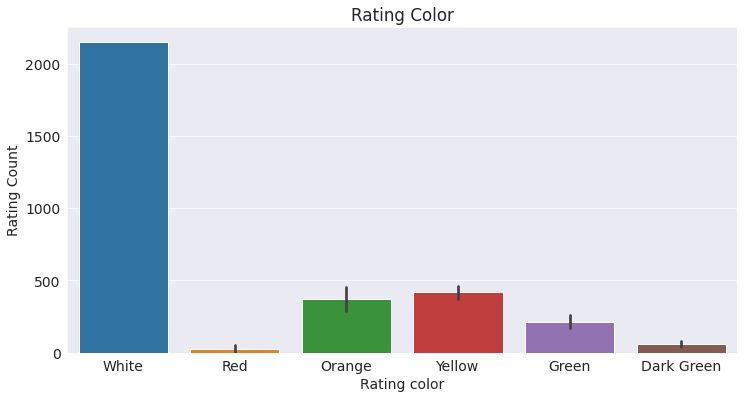

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
# plt.xticks(rotation=75)
plt.title('Rating Color')
sns.barplot(x=df3['Rating color'], y=df3['Rating Count']);

Interestingly, Maximum restaurants seems to have gone with **No ratings**.

 Let us check if these resturants belong to some specific country.

In [13]:
No_rating = df2[df2['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
No_rating

,Country,Rating Count
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


**India** seems to have maximum unrated restaurants. In India the culutre of ordering online food is still gaining momentum.
Hence most of the restaurants are still unrated on Zomato as people might be preferring to visit the restaurant for a meal.

## **Country and Currency**

In [14]:
country_currency = df2[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_currency.sort_values('Currency').reset_index(drop=True)

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Brazil,Brazilian Real(R$)
2,Australia,Dollar($)
3,Canada,Dollar($)
4,Singapore,Dollar($)
5,United States,Dollar($)
6,UAE,Emirati Diram(AED)
7,India,Indian Rupees(Rs.)
8,Indonesia,Indonesian Rupiah(IDR)
9,New Zealand,NewZealand($)


Above table displays countries along with the currency they accept. Interstingly four countries seems to be accepting currency in **dollars($)**.

# **Online delivery distribution**

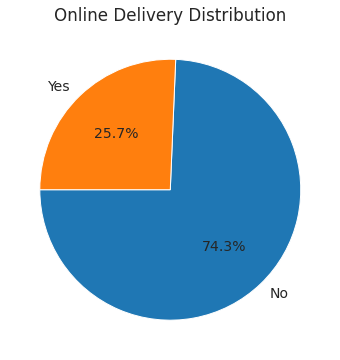

In [15]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df2['Has Online delivery'].value_counts()/9551*100, labels=df2['Has Online delivery'].value_counts().index, autopct='%1.1f%%', startangle=180);

Only **25.7%** of restaurants **accept online delivery**. This data might be biased as we have maximum restaurants listed here from India. Maybe analysis over city wise would be more helpful.

## **Let us try to Understand the Coverage of City**

In [16]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
plt.figure(figsize=(12,6))
# import plotly.plotly as py

labels = list(df2.City.value_counts().head(20).index)
values = list(df2.City.value_counts().head(20).values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence Citywise",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Cities",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
iplot(fig);

<Figure size 864x432 with 0 Axes>

The data seems to be skewed towards **New Delhi, Gurgaon** and **Noida**. I see minimal data for other cities. Hence I would do my analysis predominantly on New Delhi.

# **Asking and Answering Questions**

We've already gained several insights about the restaurants present in the survey. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

### Q1: From which Locality maximum hotels are listed in Zomato ?

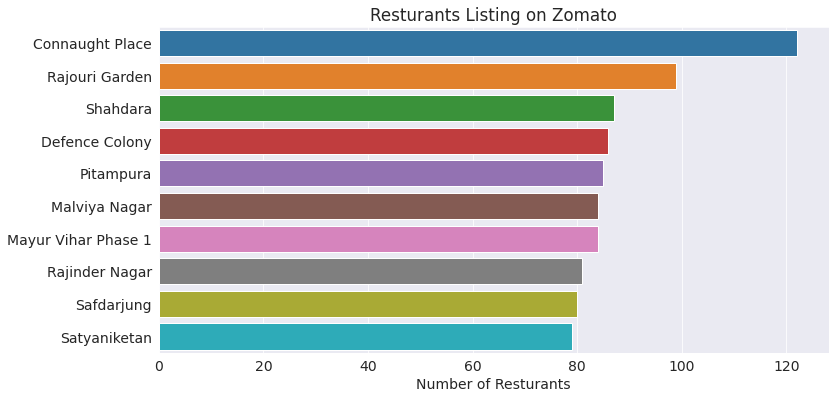

In [17]:
Delhi = df2[(df2.City == 'New Delhi')]
plt.figure(figsize=(12,6))
sns.barplot(x=Delhi.Locality.value_counts().head(10), y=Delhi.Locality.value_counts().head(10).index)

plt.ylabel(None);
plt.xlabel('Number of Resturants')
plt.title('Resturants Listing on Zomato');

**Connaught Place** seems to have high no of restaurants registered with Zomato.

Let us understand the cuisines the top rated restaurants has to offer.

### Q2: What kind of Cuisine these highly rates restaurants offer ?

In [18]:
# I achieve this by the following steps

## Fetching the resturants having 'Excellent' and 'Very Good' rating
ConnaughtPlace = Delhi[(Delhi.Locality.isin(['Connaught Place'])) & (Delhi['Rating text'].isin(['Excellent','Very Good']))]

ConnaughtPlace = ConnaughtPlace.Cuisines.value_counts().reset_index()

## Extracing all the cuisens in a single list
cuisine = []
for x in ConnaughtPlace['index']: 
  cuisine.append(x)

# cuisien = '[%s]'%', '.join(map(str, cuisien))
cuisine

['North Indian, Chinese, Italian, Continental',
 'North Indian, European, Asian, Mediterranean',
 'Italian, Mexican, Continental, North Indian, Finger Food',
 'Biryani, Hyderabadi',
 'North Indian, Afghani, Mughlai',
 'Chinese',
 'North Indian, Chinese, Italian, American, Middle Eastern',
 'North Indian, Continental',
 'Ice Cream',
 'Bakery, Desserts, Fast Food',
 'Continental, North Indian, Italian, Asian',
 'Healthy Food, Continental, Italian',
 'North Indian, Mediterranean, Asian, Fast Food',
 'Modern Indian',
 'Fast Food, American, Burger',
 'North Indian, Italian, Asian, American',
 'North Indian, Chinese, Continental, Italian',
 'North Indian, European',
 'North Indian, Chinese',
 'Continental, Mediterranean, Italian, North Indian',
 'Biryani, North Indian, Hyderabadi',
 'Continental, American, Asian, North Indian',
 'Continental, Italian, Asian, Indian',
 'North Indian',
 'Bakery, Fast Food, Desserts',
 'Asian, North Indian',
 'Cafe',
 'Continental, Mexican, Burger, American, Pi

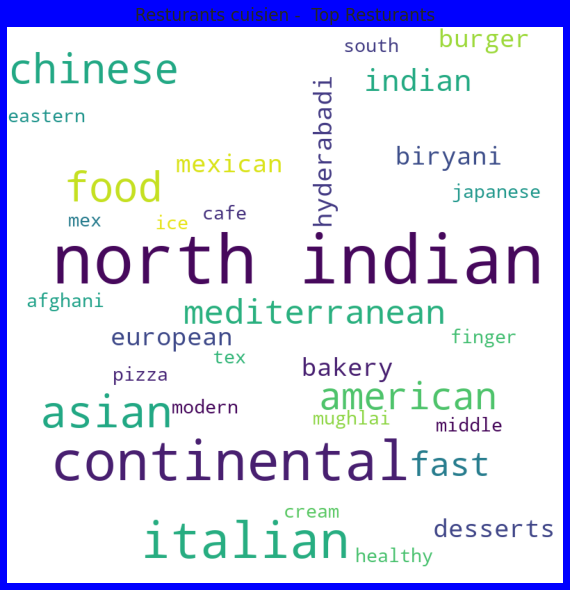

In [20]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
  
comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in cuisine:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = 'b', edgecolor='g')
plt.title('Resturants cuisien -  Top Resturants')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Top rated restaurants seems to be doing well in the following cuisine:

- North Indian
- Chinese
- Italian
- American 

### Q3: How many of such restaurants accept online delivery ? 

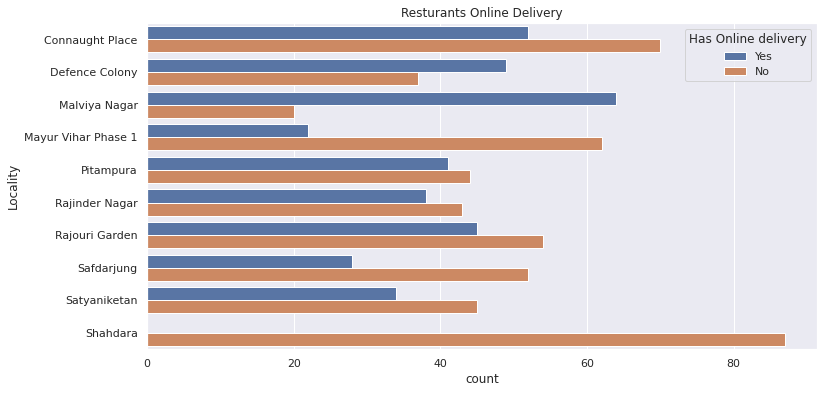

In [21]:
top_locality = Delhi.Locality.value_counts().head(10)
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12,6))
ax = sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery');

Apart from Shahdara locality, restaurants in other locality accepts online delivery.

Online Delivery seems to be on higher side in Defence Colony and Malviya Nagar.

### Q4: Understanding the Restaurants Rating locality wise ?

Apart from Malviya Nagar, Defence Colony in rest of the locality people seems to prefer visting the resturants rather ordering food online.

I would now like to understand the rating of these resturants that are providing online delivery in Maliviya Nagar, Defence Colony.

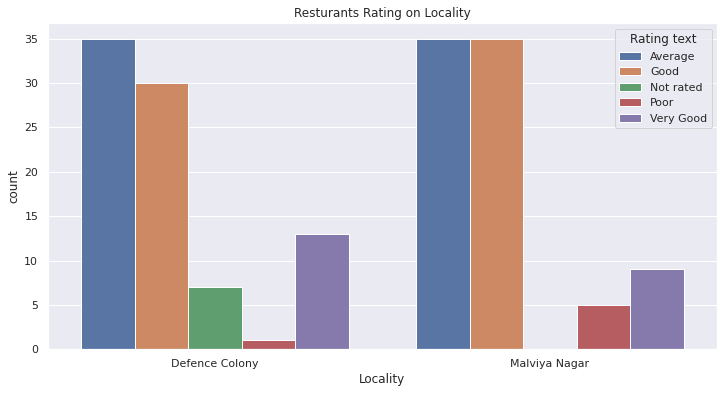

In [22]:
DefenceColony_MalviNagar = Delhi[Delhi.Locality.isin(['Defence Colony', 'Malviya Nagar'])]
plt.figure(figsize=(12,6))
ax = sns.countplot(x= "Locality", hue="Rating text", data=DefenceColony_MalviNagar)
plt.title('Resturants Rating on Locality');

Defence Colony seems to have high no of highly rated resturants but Malviya Nagar seems to done better in terms of Good and Average resturants.

As restarants with 'Poor' and 'Not Rated' is far lesser that 'Good', 'Very Good' and 'Excellent' resturants. Hence people in these localities prefer online ordering . 

### Q5: Rating VS Cost of Dining ? 

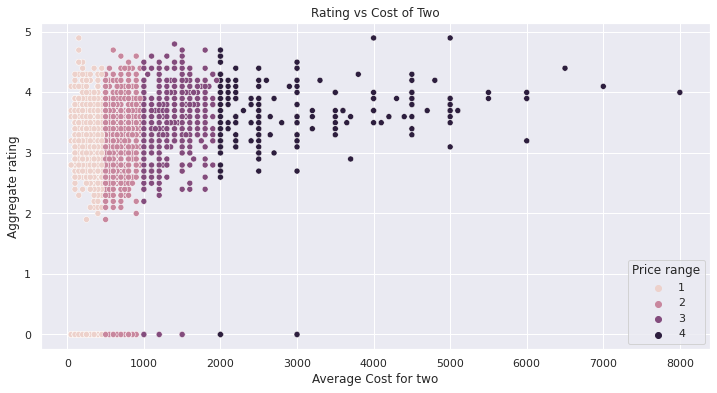

In [23]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="Average Cost for two", y="Aggregate rating", hue='Price range', data=Delhi)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two');

I observe there is no linear relation between price and rating. For instance, Restaurants with good Rating (like 4-5) have restaurants with all the price range and spread across the entire X axis . 

### Q6: Location of Higly rated resturants across New Delhi ? 

In [24]:
Delhi['Rating text'].value_counts()

Average      2495
Not rated    1425
Good         1128
Very Good     300
Poor           97
Excellent      28
Name: Rating text, dtype: int64

There seems to be around **28 restaurants** which have Excellent rating in New Delhi. Let me explore their location

In [25]:
import plotly.express as px
Highly_rated = Delhi[Delhi['Rating text'].isin(['Excellent'])]

fig = px.scatter_mapbox(Highly_rated, lat="Latitude", lon="Longitude", hover_name="City", hover_data=["Aggregate rating", "Restaurant Name"],
                        color_discrete_sequence=["fuchsia"], zoom=10, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title='Highle rated Resturants Location',
                  autosize=True,
                  hovermode='closest',
                  showlegend=False)
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()

The aforementioned four cities represent nearly 65% of the total data available in the dataset. Apart from the higly rated local restaurants, it would be interesting to know where the known-eateries that are commonplace. The verticles across which these can be located are -

- Breakfast
- American Fast Food
- Ice Creams, Shakes & Desserts

### Q7: Common Eateries ?

#### 1: Breakfast and Coffee Locations

In [26]:
types = {
    "Breakfast and Coffee" : ["Cafe Coffee Day", "Starbucks", "Barista", "Costa Coffee", "Chaayos", "Dunkin' Donuts"],
    "American": ["Domino's Pizza", "McDonald's", "Burger King", "Subway", "Dunkin' Donuts", "Pizza Hut"],
    "Ice Creams and Shakes": ["Keventers", "Giani", "Giani's", "Starbucks", "Baskin Robbins", "Nirula's Ice Cream"]
}

breakfast = Delhi[Delhi['Restaurant Name'].isin(types['Breakfast and Coffee'])]
american = Delhi[Delhi['Restaurant Name'].isin(types['American'])]
ice_cream = Delhi[Delhi['Restaurant Name'].isin(types['Ice Creams and Shakes'])]

In [27]:
breakfast = breakfast[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
breakfast

,Restaurant Name,Aggregate rating
2,Chaayos,3.812500
5,Starbucks,3.750000
3,Costa Coffee,3.450000
0,Barista,3.325000
4,Dunkin' Donuts,3.300000
1,Cafe Coffee Day,2.573684


In [28]:
import plotly.express as px

df= breakfast
fig = px.bar(df, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Breakfast and Coffee locations")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show()

Chaayos outlets are doing better. We need more of those in Delhi. Cafe coffee day seems to be performing poorly in avg rating. They are required to improve their services.

### 2: Fast Food Restaurants

In [29]:
american = american[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
american

,Restaurant Name,Aggregate rating
0,Burger King,3.477778
3,McDonald's,3.445455
2,Dunkin' Donuts,3.300000
4,Pizza Hut,3.158333
5,Subway,3.047368
1,Domino's Pizza,2.794545


In [30]:
import plotly.express as px

df= american
fig = px.bar(df, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Fast Food Resturants")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)

fig.show()

Some Surprising facts - 
- Burger King is rated higher that McDonald's. 
- Domino's seems to have got least rating.
- Dunkin's donuts and Subway are rated over Domino's

#### 3: Ice Cream Parlours



In [31]:
ice_cream = ice_cream[['Restaurant Name','Aggregate rating']].groupby('Restaurant Name').mean().reset_index().sort_values('Aggregate rating',ascending=False)
ice_cream

,Restaurant Name,Aggregate rating
5,Starbucks,3.750000
2,Giani's,3.011765
3,Keventers,2.983333
0,Baskin Robbins,2.769231
1,Giani,2.675000
4,Nirula's Ice Cream,2.400000


In [32]:
import plotly.express as px

df= ice_cream
fig = px.bar(df, y='Aggregate rating', x='Restaurant Name', text='Aggregate rating', title="Ice Cream Parlours")
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,)
fig.show()

Foreign brands seems to be doing better than the local brands.

# **Inferences and Conclusions**
We've drawn many inferences from the survey. Here's a summary of a few of them:

- The dataset is skewed towards India and doesn't represent the complete data of restaurants worldwide.

- Restaurants rating is categorised into six varieties: 
  - Not Rated
  - Average
  - Good
  - Very Good
  - Excellent

- Connaught Palace have maximum restaurants listed on Zomato but in terms of online delivery accpetance Defence colony and Maliva Nagar seems to be doing better.

- The top rated resturants seems to be getting better rating on the following cuisine
  - North Indian
  - Chinese
  - american
  - Italian

- There is no relation between Cost and Rating. Some of the best rated resturants are Low on cost and vica versa.

- On Common Eateries, for Breakfast and Coffee location Indian restaurants seems to be better rated but for Fast Food chain and Ice cream parlours American restaurants seems to be doing better.
